In [1]:
from bs4 import BeautifulSoup as BS
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
request = urllib.request.Request("https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup = BS(resulttext, 'html.parser')
table = soup.find_all('table', class_="sortable wikitable")
table_2 = table[0]
table_headers = table_2.find_all("th")
columns = [th.text for th in table_headers]
rows = []
for tr in table_2.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows.append(row_data)
earthquakes = pd.DataFrame(rows, columns = columns)
earthquakes.head(1)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,


In [3]:
earthquakes = earthquakes.replace("", np.nan)
test = "(\[\d+\]|\(.*\)|\*|\+|\,)"
earthquakes["Other Source Deaths"] = earthquakes["Other Source Deaths"].str.replace(test, "")
earthquakes.tail()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1335,2011-03-11 14:46,Japan (see 2011 Tōhoku earthquake),38.322,142.369,24.4,9.0 Mw,T,NaN,NaN,NaN,NaN,15894
1336,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150
1337,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1338,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111
1339,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,601


In [4]:
earthquakes[earthquakes["Lat"].isnull()]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
439,1966-04-25 23:22,Uzbekistan (see 1966 Tashkent earthquake),NaN,NaN,NaN,5 ML,NaN,NaN,NaN,NaN,10[7]|,None
1319,2008-10-06 16:30,China (see 2008 Damxung earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1320,2008-10-28 23:09,Pakistan (see 2008 Ziarat earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,215
1323,2009-07-09 11:19,China (see 2009 Yunnan earthquake),NaN,NaN,NaN,5.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1324,2009-08-10 20:07,Japan (see 2009 Shizuoka earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,1
1325,2009-09-02 07:55,Indonesia (see 2009 West Java earthquake),NaN,NaN,NaN,7.0 Mw,NaN,NaN,NaN,NaN,NaN,79
1326,2009-09-29 17:48,Samoa (see 2009 Samoa earthquake and tsunami),NaN,NaN,8.1,8.1 Mw,NaN,NaN,NaN,NaN,NaN,189
1327,2009-09-30 10:16,Indonesia (see 2009 Padang earthquake),NaN,NaN,NaN,7.6 Mw,NaN,NaN,NaN,NaN,NaN,1115
1330,2010-03-08 02:32,Turkey (see 2010 Elâzığ earthquake),NaN,NaN,NaN,6.1 Mw,NaN,NaN,NaN,NaN,NaN,42
1331,2010-03-11 14:39,Chile (see 2010 Pichilemu earthquake),NaN,NaN,NaN,6.9 Mw,L,NaN,NaN,NaN,NaN,1


In [5]:
earthquakes.iloc[439, earthquakes.columns.get_loc('Lat')] = 41.16
earthquakes.iloc[439, earthquakes.columns.get_loc('Long')] = 69.13
earthquakes.iloc[1319, earthquakes.columns.get_loc('Lat')] = 29.759
earthquakes.iloc[1319, earthquakes.columns.get_loc('Long')] = 90.302
earthquakes.iloc[1320, earthquakes.columns.get_loc('Lat')] = 30.569
earthquakes.iloc[1320, earthquakes.columns.get_loc('Long')] = 67.484
earthquakes.iloc[1323, earthquakes.columns.get_loc('Lat')] = 25.619
earthquakes.iloc[1323, earthquakes.columns.get_loc('Long')] = 101.086
earthquakes.iloc[1324, earthquakes.columns.get_loc('Lat')] = 34.778
earthquakes.iloc[1324, earthquakes.columns.get_loc('Long')] = 138.276
earthquakes.iloc[1325, earthquakes.columns.get_loc('Lat')] = -7.778
earthquakes.iloc[1325, earthquakes.columns.get_loc('Long')] = 107.328
earthquakes.iloc[1326, earthquakes.columns.get_loc('Lat')] = -15.53
earthquakes.iloc[1326, earthquakes.columns.get_loc('Long')] = -171.87
earthquakes.iloc[1327, earthquakes.columns.get_loc('Lat')] = 0.71
earthquakes.iloc[1327, earthquakes.columns.get_loc('Long')] = 99.97
earthquakes.iloc[1330, earthquakes.columns.get_loc('Lat')] = 38.79
earthquakes.iloc[1330, earthquakes.columns.get_loc('Long')] = 40.03
earthquakes.iloc[1331, earthquakes.columns.get_loc('Lat')] = -34.301
earthquakes.iloc[1331, earthquakes.columns.get_loc('Long')] = -72.13
earthquakes.iloc[1332, earthquakes.columns.get_loc('Lat')] = 33.165
earthquakes.iloc[1332, earthquakes.columns.get_loc('Long')] = 96.629
earthquakes.iloc[1333, earthquakes.columns.get_loc('Lat')] = -43.5834
earthquakes.iloc[1333, earthquakes.columns.get_loc('Long')] = 172.7012
earthquakes.iloc[1334, earthquakes.columns.get_loc('Lat')] = 24.71
earthquakes.iloc[1334, earthquakes.columns.get_loc('Long')] = 97.994
earthquakes.iloc[1336, earthquakes.columns.get_loc('Lat')] = 20.705
earthquakes.iloc[1336, earthquakes.columns.get_loc('Long')] = 99.949
earthquakes.iloc[413, earthquakes.columns.get_loc("Lat")] = 42.1
earthquakes.iloc[413, earthquakes.columns.get_loc("Long")] = 21.4
earthquakes.iloc[413, earthquakes.columns.get_loc("Depth (km)")] = 6
earthquakes.iloc[[413, 439, 1319, 1320, 1323, 1324, 1325, 1326, 1327, 1330, 1331, 1332, 1333, 1334, 1336]]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
413,1963-06-26 04:17,Macedonia (see 1963 Skopje earthquake),42.1,21.4,6,6.1 Mw,NaN,NaN,1100,NaN,NaN,None
439,1966-04-25 23:22,Uzbekistan (see 1966 Tashkent earthquake),41.16,69.13,NaN,5 ML,NaN,NaN,NaN,NaN,10[7]|,None
1319,2008-10-06 16:30,China (see 2008 Damxung earthquake),29.759,90.302,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1320,2008-10-28 23:09,Pakistan (see 2008 Ziarat earthquake),30.569,67.484,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,215
1323,2009-07-09 11:19,China (see 2009 Yunnan earthquake),25.619,101.086,NaN,5.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1324,2009-08-10 20:07,Japan (see 2009 Shizuoka earthquake),34.778,138.276,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,1
1325,2009-09-02 07:55,Indonesia (see 2009 West Java earthquake),-7.778,107.328,NaN,7.0 Mw,NaN,NaN,NaN,NaN,NaN,79
1326,2009-09-29 17:48,Samoa (see 2009 Samoa earthquake and tsunami),-15.53,-171.87,8.1,8.1 Mw,NaN,NaN,NaN,NaN,NaN,189
1327,2009-09-30 10:16,Indonesia (see 2009 Padang earthquake),0.71,99.97,NaN,7.6 Mw,NaN,NaN,NaN,NaN,NaN,1115
1330,2010-03-08 02:32,Turkey (see 2010 Elâzığ earthquake),38.79,40.03,NaN,6.1 Mw,NaN,NaN,NaN,NaN,NaN,42


In [6]:
means = []
for row in earthquakes["Other Source Deaths"]:
    print("\noriginal: {}".format(type(row)))
    if isinstance(row, str):
        int_list = row.strip().split(" ")
        print("transformed: {}".format(int_list))
        total = sum(list(map(int, int_list)))
        number = len(int_list)
        mean = total/number
        means.append(mean)
        print(mean)
    else:
        means.append(row)
        
earthquakes["Other Source Deaths"] = means


original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'str'>
transformed: ['3500']
3500.0

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>



original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

o

In [7]:
for col in ['EM-DAT Total Deaths', 'Magnitude']:
    earthquakes[col] = earthquakes[col].str.extract('(\d+\.\d*)', expand=True)

In [8]:
def nan_to_int(df, columns, value=0, inplace=True):
    """Transforms the column in the dataframe to a float32 column, rather than the object type. 
    Also fills all NaN values to 0.
    """
    for col in columns:        
        df[col].fillna(value=value, inplace=inplace)
        df[col] = pd.to_numeric(df[col], downcast='float')

In [9]:
columns_to_convert = ['PDE Total Deaths', 'PDE Shaking Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Magnitude']
nan_to_int(df=earthquakes, columns=columns_to_convert)

In [10]:
subdf = earthquakes[["PDE Total Deaths", "Utsu Total Deaths", "EM-DAT Total Deaths", "Other Source Deaths"]]
earthquakes["deaths"] = subdf.max(axis = 1)
earthquakes.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,0.0,0.0,140.0,0.0,NaN,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,0.0,0.0,0.0,0.0,NaN,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,0.0,0.0,0.0,0.0,NaN,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,0.0,0.0,4.0,0.0,NaN,4.0


In [11]:
earthquakes.columns = ["UTC", "Country", "lat", "lng", "Depth_km", "Mag", "Secondary_Effects", "PDE_Shaking_Deaths", "PDE_Deaths", "Utsu_Deaths", "EM-DAT_Deahts", "Other_Deaths", "Max_Deaths"]
test2="(\s\(.*)"
earthquakes['Country']= earthquakes['Country'].str.replace(test2, "")

In [12]:
earthquakes["UTC"] = pd.to_datetime(earthquakes["UTC"])
earthquakes["Year"] = pd.DatetimeIndex(earthquakes["UTC"]).year
earthquakes["Month"] = pd.DatetimeIndex(earthquakes["UTC"]).month
earthquakes["Month"] = earthquakes.Month.map("{:02}".format)
earthquakes["Day"] = pd.DatetimeIndex(earthquakes["UTC"]).day

In [13]:
#earthquakes.to_json("JSONs_for_TP/earthquakes_original.json")

In [14]:
def scrape_the_web(url, class_):
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    resulttext = result.read()
    soup = BS(resulttext, 'html.parser')
    table = soup.find_all('table', class_=class_)
    table_2 = table[0]
    table_headers = table_2.find_all("th")
    columns = [th.text for th in table_headers]
    rows = []
    for tr in table_2.find_all("tr")[1:]:
        row_data = [td.text for td in tr.find_all("td")]
        rows.append(row_data)
    return pd.DataFrame(rows, columns = columns)

In [15]:
volcanoes = scrape_the_web(url = "http://volcano.oregonstate.edu/volcano_table", class_ = "views-table cols-6")
volcanoes.head(1)

,Volcano Name,Country,Type,Latitude (dd),Longitude (dd),Elevation (m)
0,\nAbu,\n Japan,\n Shield,\n 34.50,\n 131.60,\n 641


In [16]:
volcanoes.columns = ["Name", "Country", "Type", "lat", "lng", "Elevation"]
test_v = "(\n|\n\s)"
volcanoes = volcanoes.replace(to_replace = test_v, value = "", regex = True)
volcanoes["lat"] = volcanoes["lat"].str.strip()
volcanoes["lng"] = volcanoes["lng"].str.strip()
volcanoes["lat"] = pd.to_numeric(volcanoes["lat"])
volcanoes["lng"] = pd.to_numeric(volcanoes["lng"])

geometry = [Point(xy) for xy in zip(volcanoes.lng, volcanoes.lat)]
crs = {"init": "epsg:4326"} 
volcanoes_gdf = gpd.GeoDataFrame(volcanoes, crs=crs, geometry=geometry)

In [17]:
vents = scrape_the_web(url = "http://vents-data.interridge.org/ventfields_list_all", class_ = "views-table cols-8")
vents = vents.replace(to_replace = test_v, value = "", regex = True)
vents.columns = ["Name", "Activity", "Tectonic Setting", "Region", "lat", "lng", "Depth", "Year&Discovered"]
vents["lat"] = vents["lat"].str.strip()
vents["lng"] = vents["lng"].str.strip()
cols = ["lat", "lng", "Depth"]
vents[cols] = vents[cols].apply(pd.to_numeric)#, errors='coerce')
geometry_vent = [Point(xy) for xy in zip(vents.lng, vents.lat)] 
vents_gdf = gpd.GeoDataFrame(vents, crs=crs, geometry=geometry_vent)
#vents.head(1)
vents_gdf.head(1)

,Name,Activity,Tectonic Setting,Region,lat,lng,Depth,Year&Discovered,geometry
0,13 N Ridge Site,"active, confirmed",back-arc spreading center,Mariana Trough,13.0987,143.6886,2900.0,"2000 deep-tow camera (later, same ...",POINT (143.6886 13.0987)


In [18]:
eruptions = pd.read_table("MR_Data/volerup.txt")
eruptions = eruptions.drop(["TOTAL_HOUSES_DESTROYED_DESCRIPTION", "TOTAL_HOUSES_DESTROYED", "TOTAL_DAMAGE_DESCRIPTION", 
                            "TOTAL_DAMAGE_MILLIONS_DOLLARS", "TOTAL_INJURIES_DESCRIPTION", "TOTAL_INJURIES", 
                            "TOTAL_MISSING_DESCRIPTION", "TOTAL_MISSING", "TOTAL_DEATHS_DESCRIPTION", 
                            "HOUSES_DESTROYED_DESCRIPTION", "HOUSES_DESTROYED", "DAMAGE_DESCRIPTION", 
                            "DAMAGE_MILLIONS_DOLLARS", "INJURIES_DESCRIPTION", "INJURIES", "MISSING_DESCRIPTION", 
                            "MISSING", "DEATHS_DESCRIPTION", "DEATHS", "Agent"], axis = 1)
#geometry_erupt = [Point(xy) for xy in zip(eruptions.Longitude, eruptions.Latitude)]
#eruptions_gdf = gpd.GeoDataFrame(eruptions, crs=crs, geometry=geometry_erupt)

In [19]:
tsunamis_2 = pd.read_csv("MR_Data/tsunamis.csv")
tsunamis_2 = tsunamis_2.drop("Unnamed: 0", axis = 1)
tsunamis_2.columns = ["Year", "Month", "Day", "Focal_Depth", "Magnitude", "Country", "Location", "lat", "lng", "Max_Water_Height", "Deaths", "Total_Deaths"]
tsunamis_2 = tsunamis_2.drop(0)
#tsunamis_2
#tsunamis_2["lat"] = pd.to_numeric(tsunamis_2["lat"])
#tsunamis_2["lng"] = pd.to_numeric(tsunamis_2["lng"])
#geometry_t = [Point(xy) for xy in zip(tsunamis_2.lng, tsunamis_2.lat)]
#tsunamis_gdf = gpd.GeoDataFrame(tsunamis_2, crs=crs, geometry=geometry_t)
#tsunamis_gdf.head()

In [20]:
quakes_country = earthquakes.groupby("Country").agg(len)
quakes_country = quakes_country.reset_index()
quakes_country_25 = quakes_country.nlargest(25, columns = "UTC")

[Text(0,0,'China'),
 Text(0,0,'Indonesia'),
 Text(0,0,'Turkey'),
 Text(0,0,'Iran'),
 Text(0,0,'Japan'),
 Text(0,0,'Peru'),
 Text(0,0,'Taiwan'),
 Text(0,0,'Mexico'),
 Text(0,0,'Chile'),
 Text(0,0,'Greece'),
 Text(0,0,'Philippines'),
 Text(0,0,'Italy'),
 Text(0,0,'United States'),
 Text(0,0,'Afghanistan'),
 Text(0,0,'Pakistan'),
 Text(0,0,'India'),
 Text(0,0,'Colombia'),
 Text(0,0,'Algeria'),
 Text(0,0,'Ecuador'),
 Text(0,0,'Papua New Guinea'),
 Text(0,0,'Guatemala'),
 Text(0,0,'South Africa'),
 Text(0,0,'Russian Federation'),
 Text(0,0,'Argentina'),
 Text(0,0,'Burma')]

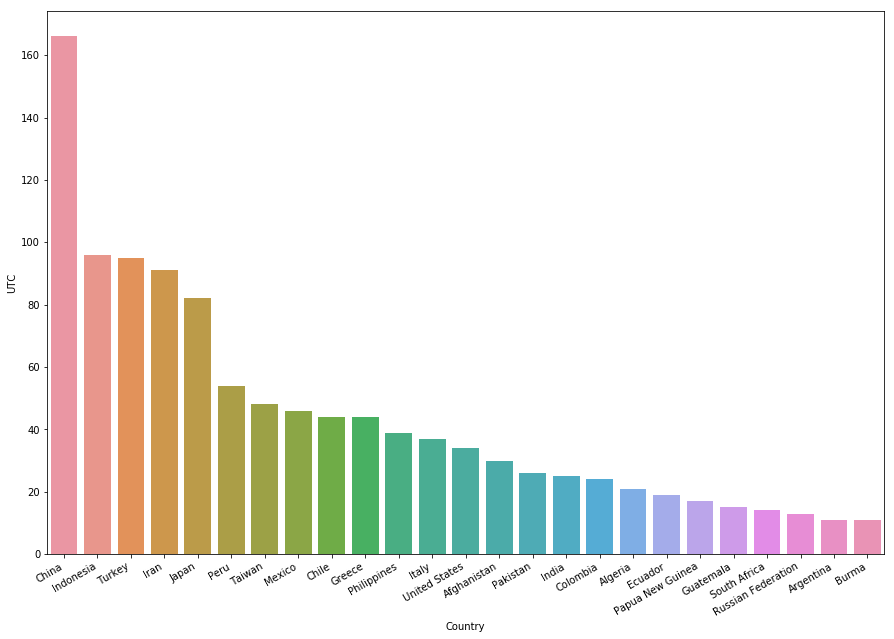

In [21]:
f, ax = plt.subplots(figsize=(15, 10))
quake_count = sns.barplot(quakes_country_25.Country, quakes_country_25.UTC)
quake_count.set_xticklabels(quake_count.get_xticklabels(), rotation=30, ha="right")

(array([ 181.,    0.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,   15.,    2.,    7.,   20.,    5.,   66.,
           4.,    5.,    4.,    6.,   16.,    8.,    8.,    9.,    6.,
          13.,   14.,   22.,    5.,   13.,    5.,    4.,   16.,    6.,
          10.,    6.,   33.,    7.,   38.,   10.,   13.,   10.,   11.,
           5.,   12.,    5.,   14.,    9.,   10.,    5.,   17.,   16.,
         120.,    7.,   27.,    8.,    7.,   13.,    8.,   12.,   10.,
           9.,   10.,    8.,    6.,    7.,    6.,    6.,    5.,   85.,
          13.,    6.,    8.,    9.,    7.,    4.,   10.,   14.,   13.,
          13.,    6.,    5.,    8.,    7.,   21.,   12.,   14.,   10.,
           9.,   21.,    6.,    9.,   21.,   18.,   10.,    6.,    4.,    5.]),
 array([  -1.  ,    3.32,    7.64,   11.96,   16.28,   20.6 ,   24.92,
          29.24,   33.56,   37.88,   42.2 ,   46.52,   50.84,   55.16,
          59.48,   63.8 ,   68.12,   72.44,   76.76,   81.08,   85.4

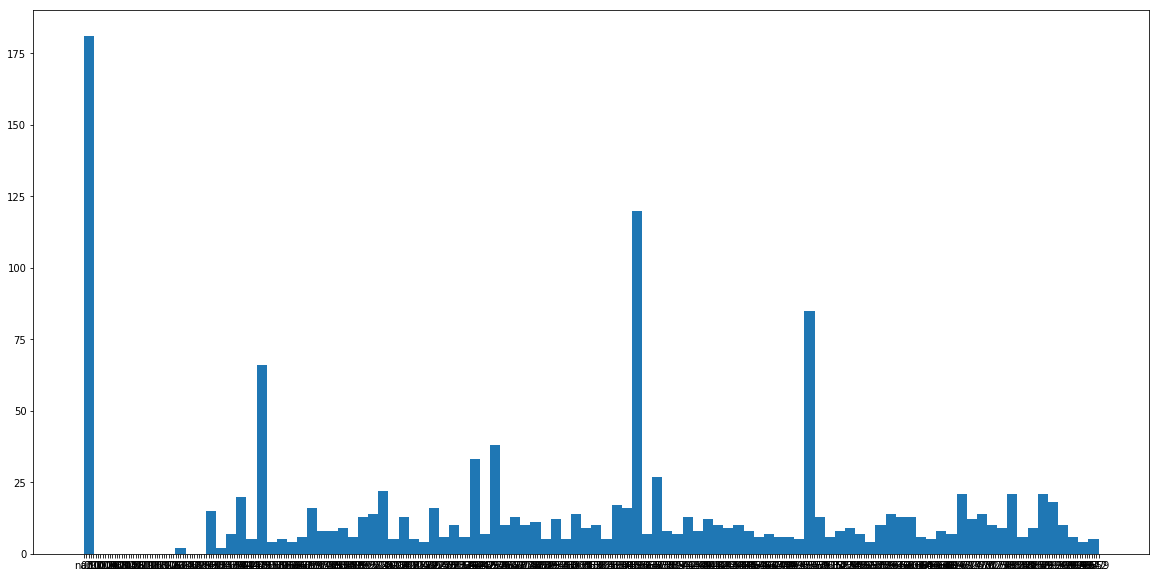

In [22]:
plt.figure(figsize=(20,10))
plt.hist(earthquakes["Depth_km"], bins = 100)

/anaconda3/envs/data-question-3-striking-robots/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


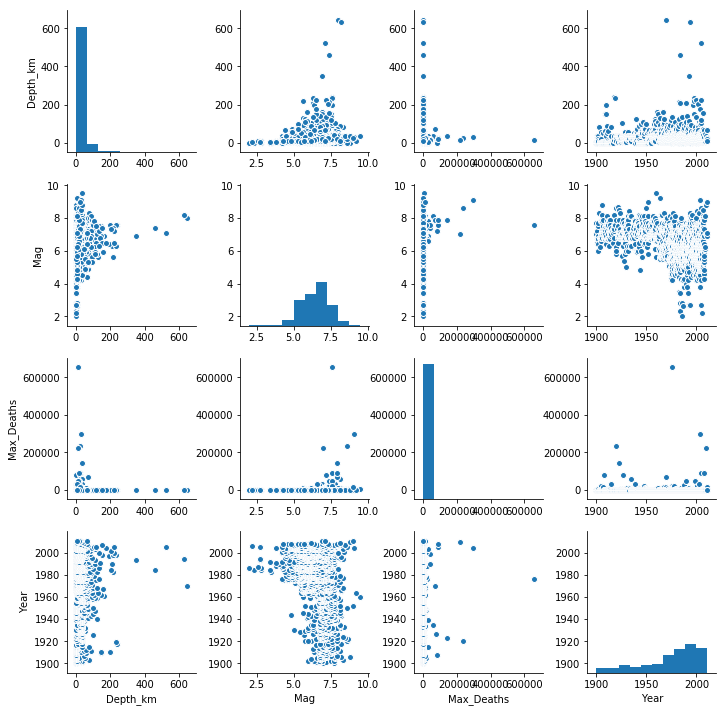

In [23]:
earthquakes_cont = earthquakes[["Depth_km", "Mag", "Max_Deaths", "Year"]]
earthquakes_cont["Depth_km"] = pd.to_numeric(earthquakes_cont["Depth_km"])
earthquakes_cont = earthquakes_cont.dropna()
sns.pairplot(earthquakes_cont, dropna=True)

In [24]:
plates_gdf = gpd.read_file("MR_Data/PB2002_plates.json")
countries_gdf = gpd.read_file("MR_Data/countries.geojson")

In [25]:
earthquakes["lat"] = pd.to_numeric(earthquakes["lat"])
earthquakes["lng"] = pd.to_numeric(earthquakes["lng"])

geometry = [Point(xy) for xy in zip(earthquakes.lng, earthquakes.lat)]
earthquakes_gdf = gpd.GeoDataFrame(earthquakes, crs=crs, geometry=geometry)

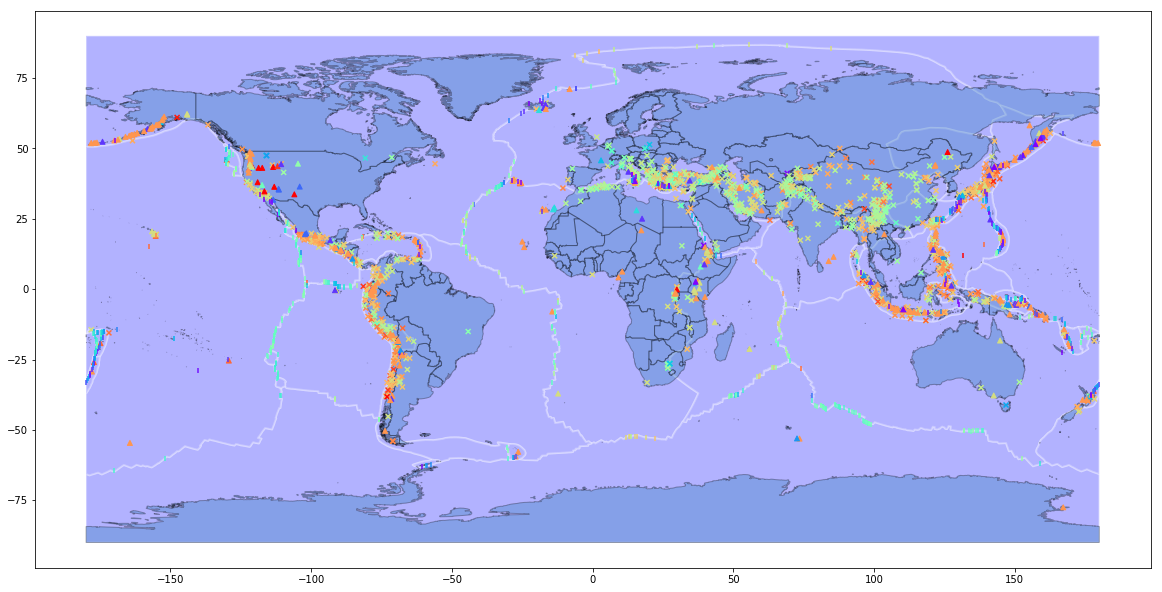

In [26]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 2.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.3)
earthquakes_gdf.plot(ax=ax, markersize = 25, column = "Mag", cmap = "rainbow", marker = "x")
volcanoes_gdf.plot(ax=ax, markersize = 25, column = "Type", cmap = "rainbow", marker = "^")
vents_gdf.plot(ax=ax, markersize = 25, column = "Depth", cmap = "rainbow", marker = "|")

In [27]:
boundaries_gdf = gpd.read_file("MR_Data/PB2002_steps.json")

In [28]:
boundaries_sub = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "SUB"]
boundaries_ccb = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "CCB"]
boundaries_crb = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "CRB"]
boundaries_ctf = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "CTF"]
boundaries_ocb = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "OCB"]
boundaries_osr = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "OSR"]
boundaries_otf = boundaries_gdf[boundaries_gdf["STEPCLASS"] == "OTF"]

In [29]:
earthquakes_gdf = earthquakes_gdf.drop(earthquakes_gdf[earthquakes_gdf["geometry"].isnull()].index)
#len(earthquakes_gdf)
new_index = range(0, 1340)
earthquakes_gdf.index = new_index

In [30]:
earthquakes_geo = earthquakes_gdf["geometry"]
sub_geo = boundaries_sub["geometry"]
boundaries_geo = boundaries_gdf["geometry"]
ccb_geo = boundaries_ccb["geometry"]
crb_geo = boundaries_crb["geometry"]
ctf_geo = boundaries_ctf["geometry"]
ocb_geo = boundaries_ocb["geometry"]
osr_geo = boundaries_osr["geometry"]
otf_geo = boundaries_otf["geometry"]

In [31]:
def quake_dist(geoseries):
    dist_list = []
    for quake in earthquakes_geo:
        dist = np.min([quake.distance(vol) for vol in geoseries])
        dist_list.append(dist)
    return dist_list

In [32]:
boundary_list = [boundaries_geo, sub_geo, ccb_geo, crb_geo, ctf_geo, ocb_geo, osr_geo, otf_geo]

total_bound_dist = []

for geoseries in boundary_list:
    min_distances = quake_dist(geoseries)
    total_bound_dist.append(min_distances)
    
total_bound_dist

[[2.8036420955606953,
  2.239037739744461,
  0.34622322821843632,
  3.0206947876275003,
  2.7286269108863532,
  1.8348236972526688,
  0.57779366162411405,
  2.5595819971237597,
  5.8267318455545913,
  0.34945413843551243,
  0.51159076212675547,
  5.4759073220791361,
  6.9929825539607888,
  15.233104359930865,
  6.1200657676204706,
  0.19446140041409371,
  0.99481153994110716,
  2.4897793074889227,
  0.83852817232284338,
  8.0093586509782462,
  0.06649104002539577,
  0.9998300372887915,
  4.1245597340807194,
  0.1280831202973953,
  0.77104481817833048,
  3.3576330689985134,
  2.4665786020315652,
  0.77911263347581683,
  0.080057897130489317,
  0.80303956923135045,
  0.053946076041930288,
  0.053946076041930288,
  0.1406888985245065,
  0.87643861971970594,
  14.52553207287086,
  0.28138026464816474,
  1.5722116626041189,
  0.62641186890169243,
  1.2752942012244066,
  4.79309972773361,
  0.72794780321805408,
  0.012258429210794907,
  0.36424514324669233,
  1.6355837230153378,
  0.26193421

In [33]:
boundary_distances = pd.DataFrame(total_bound_dist)
boundary_distances = boundary_distances.transpose()
boundary_distances

,0,1,2,3,4,5,6,7
0,2.803642,2.877975,3.259099,11.549234,4.131410,2.803642,11.473059,4.177337
1,2.239038,10.216419,2.239038,7.533582,2.427798,21.644313,14.229416,25.071416
2,0.346223,5.519615,3.412162,0.965733,0.346223,9.083121,12.514348,5.200229
3,3.020695,14.677679,3.131844,5.183048,3.020695,13.872035,13.865524,14.009282
4,2.728627,8.001041,9.939515,2.871915,2.728627,10.288443,7.039563,11.509747
5,1.834824,1.834824,4.963809,13.535306,6.384587,3.754605,13.733517,6.189486
6,0.577794,2.674040,1.742061,4.584733,0.577794,12.327154,7.941761,2.173253
7,2.559582,3.008870,3.838880,12.922539,5.862129,2.559582,12.901242,5.986463
8,5.826732,15.290429,5.826732,12.766944,5.826732,18.695451,19.591929,22.987931
9,0.349454,5.983078,4.591220,2.827734,0.349454,13.883633,6.478630,15.630070


In [34]:
boundary_distances.columns = ["boundaries_geo", "sub_geo", "ccb_geo", "crb_geo", "ctf_geo", "ocb_geo", 
                              "osr_geo", "otf_geo"]
earthquakes_dist = pd.concat([earthquakes_gdf, boundary_distances], axis=1)
#earthquakes_dist.to_csv("MR_Data/Earthquake_boundary_distances2")

In [35]:
conditions = [
    (boundary_distances['boundaries_geo'] == boundary_distances['sub_geo']), 
    (boundary_distances['boundaries_geo'] == boundary_distances['ccb_geo']),
    (boundary_distances['boundaries_geo'] == boundary_distances['crb_geo']), 
    (boundary_distances['boundaries_geo'] == boundary_distances['ctf_geo']),
    (boundary_distances['boundaries_geo'] == boundary_distances['ocb_geo']), 
    (boundary_distances['boundaries_geo'] == boundary_distances['osr_geo']), 
    (boundary_distances['boundaries_geo'] == boundary_distances['otf_geo'])]
choices = ['SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF']
earthquakes_dist['closest_boundary'] = np.select(conditions, choices, default=np.nan)

In [36]:
def total_boundary_length(geoseries):
    lengths = []
    for line in geoseries:
        length = line.length
        lengths.append(length)
        total_length = np.sum(lengths)
    return total_length

In [37]:
boundary_list2 = [sub_geo, ccb_geo, crb_geo, ctf_geo, ocb_geo, osr_geo, otf_geo]

boundaries_length = []

for geoseries in boundary_list2:
    total_length = total_boundary_length(geoseries)
    boundaries_length.append(total_length)
    
boundaries_length

[510.15978396960389,
 227.16539713527419,
 277.45574462724835,
 282.76180162839489,
 175.70936107173887,
 810.41473295295373,
 539.2965768111593]

In [38]:
earthquakes_dist["closest_boundary"].value_counts()

CCB    470
SUB    320
CRB    239
CTF    224
OCB     41
OTF     31
OSR     15
Name: closest_boundary, dtype: int64

In [39]:
bound_dist_count = np.array([320, 470, 239, 224, 41, 15, 31])
bound_length = np.array(boundaries_length)

In [40]:
norm_bound_dist = np.divide(bound_dist_count, bound_length)
norm_bound_dist

array([ 0.62725446,  2.06897708,  0.86139864,  0.79218621,  0.23333987,
        0.01850904,  0.05748229])

Text(0,0.5,'normalized distance to closest boundary')

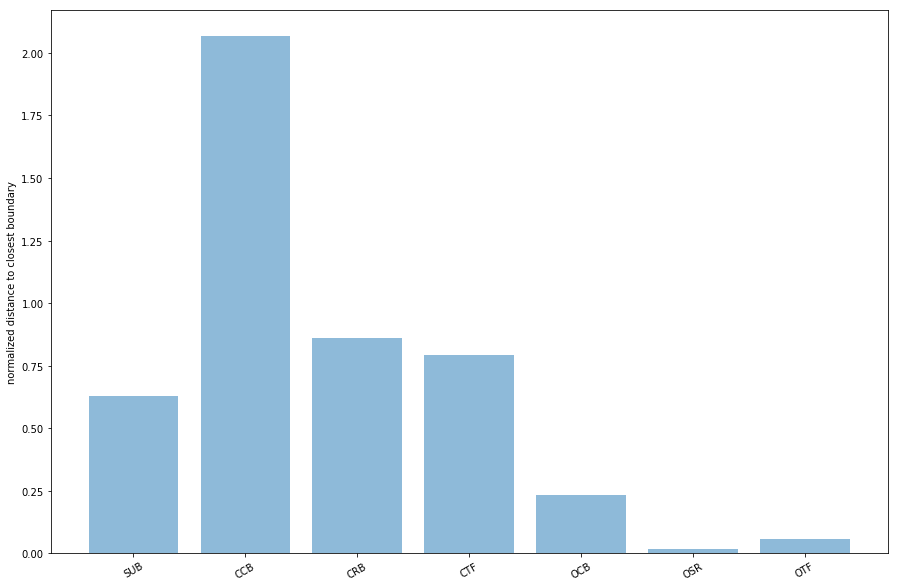

In [41]:
objects = ('SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF')
y_pos = np.arange(len(objects))
performance = norm_bound_dist
 
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects, rotation = 30)
plt.ylabel('normalized distance to closest boundary')

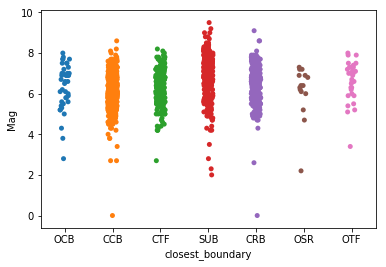

In [42]:
sns.stripplot(x="closest_boundary", y="Mag", data=earthquakes_dist, jitter=True)

In [43]:
earthquakes_dist_gdf = gpd.GeoDataFrame(earthquakes_dist, geometry = earthquakes_gdf.geometry)

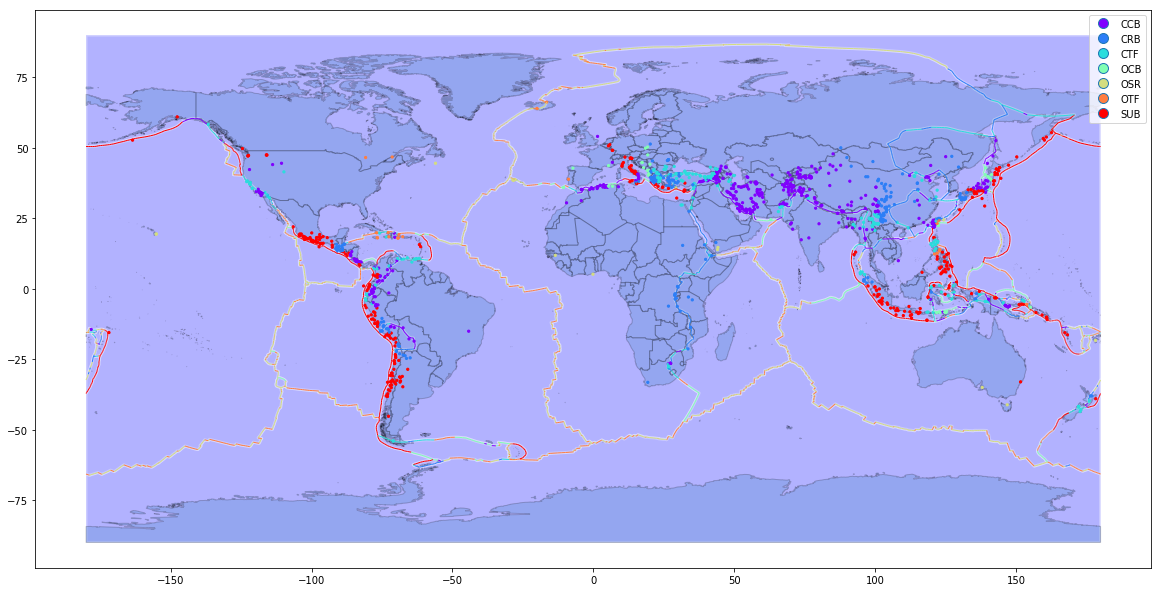

In [44]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 3.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.2)
boundaries_gdf.plot(ax=ax, column = "STEPCLASS", cmap = "rainbow", lw = 1, legend = True)
earthquakes_dist_gdf.plot(ax=ax, markersize = 5, column = "closest_boundary", cmap = "rainbow")

In [45]:
volcanoes_gdf = volcanoes_gdf.drop([86, 96, 263, 276])

In [46]:
vol_geo = volcanoes_gdf.geometry
strato_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Stratovolcano")].geometry
caldera_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Caldera")].geometry
shield_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Shield")].geometry
complex_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Complex Volcano")].geometry
submarine_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Submarine")].geometry
vol_field_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Volcanic Field")].geometry
cinder_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Cinder Cone")].geometry
dome_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Dome")].geometry
fissure_vents_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Fissure vents")].geometry
somma_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Somma Volcano")].geometry
maar_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Maar")].geometry
proclastic_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Pyroclastic Cone")].geometry
flood_basalt_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Flood Basalt")].geometry
tuff_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Tuff Ring")].geometry
plug_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Plug")].geometry
noname_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("")].geometry

In [47]:
vol_type_list = [vol_geo, strato_vol, caldera_vol, shield_vol, complex_vol, submarine_vol, vol_field_vol, 
                 cinder_vol, dome_vol, fissure_vents_vol, somma_vol, maar_vol, proclastic_vol, tuff_vol, 
                 plug_vol, noname_vol] #, flood_basalt_vol]

total_vol_dist = []

for geoseries in vol_type_list:
    dist_list = quake_dist(geoseries)
    total_vol_dist.append(dist_list)
    
total_vol_dist

[[1.1016351483136237,
  1.3416407864998674,
  4.5496813075203404,
  7.3831226456019303,
  6.9084368709571313,
  1.580284784461345,
  3.8600518131237576,
  0.38118237105094227,
  4.4147480109288271,
  2.3201939574095984,
  0.48507731342539784,
  6.5253965396748024,
  20.808652046684813,
  5.2842123348707339,
  17.751901306620649,
  6.4175774245426878,
  1.7424408167854648,
  1.9999999999999929,
  1.3132021931142195,
  6.1360084745704224,
  3.3854098717880561,
  1.0890362712049568,
  10.812238436142628,
  3.4792240514229653,
  16.763054614240211,
  5.3260961313141939,
  0.98488578017961503,
  0.81743501270743169,
  2.4698178070456964,
  3.1271232786700356,
  3.5198011307458859,
  3.5198011307458859,
  3.5048823090083898,
  4.9205081038445622,
  29.415132160165456,
  3.4375863625514915,
  10.986396133400616,
  2.4463850882475526,
  1.0117806086301502,
  13.45362404707371,
  2.6886799735186084,
  0.56824290580701642,
  1.9448650338776723,
  3.6269270739842585,
  3.7623529871610901,
  4.556

In [48]:
vol_dist = pd.DataFrame(total_vol_dist)
vol_dist = vol_dist.transpose()
vol_dist.columns = ["vol", "strato", "caldera", "shield", "complex", "submarine", "vol_field", "cinder", 
                 "dome", "fissure_vents", "somma", "maar", "proclastic", "tuff", 
                 "plug", "noname"]
quake_vol_dist = pd.concat([earthquakes_gdf, vol_dist], axis=1)

In [49]:
conditions = [
    (quake_vol_dist['vol'] == quake_vol_dist['strato']), 
    (quake_vol_dist['vol'] == quake_vol_dist['caldera']),
    (quake_vol_dist['vol'] == quake_vol_dist['shield']), 
    (quake_vol_dist['vol'] == quake_vol_dist['complex']),
    (quake_vol_dist['vol'] == quake_vol_dist['submarine']), 
    (quake_vol_dist['vol'] == quake_vol_dist['vol_field']),
    (quake_vol_dist['vol'] == quake_vol_dist['cinder']),
    (quake_vol_dist['vol'] == quake_vol_dist['dome']),
    (quake_vol_dist['vol'] == quake_vol_dist['fissure_vents']),
    (quake_vol_dist['vol'] == quake_vol_dist['somma']),
    (quake_vol_dist['vol'] == quake_vol_dist['maar']),
    (quake_vol_dist['vol'] == quake_vol_dist['proclastic']),
    (quake_vol_dist['vol'] == quake_vol_dist['tuff']),
    (quake_vol_dist['vol'] == quake_vol_dist['plug']),
    (quake_vol_dist['vol'] == quake_vol_dist['noname'])]
choices = ['strato', 'caldera', 'shield', 'complex', 'submarine', 'vol_field', 'cinder', 'dome', 'fissure_vents', 
           'somma', 'maar', 'proclastic', 'tuff', 'plug', 'noname']
quake_vol_dist['closest_vol'] = np.select(conditions, choices, default=np.nan)

In [50]:
volcanoes_gdf["Type"].value_counts()

            Stratovolcano                 275
            Caldera                        40
            Shield                         33
            Complex Volcano                16
            Submarine                      11
            Volcanic Field                 10
                                           10
            Cinder Cone                     9
            Dome                            8
            Fissure vents                   4
            Somma Volcano                   3
            Pyroclastic Cone                3
            Maar                            3
            Tuff Ring                       1
            Plug                            1
Name: Type, dtype: int64

In [51]:
quake_vol_dist["closest_vol"].value_counts()

strato           935
caldera           92
dome              90
proclastic        44
complex           41
shield            36
vol_field         27
somma             21
cinder            19
noname            15
submarine         13
fissure_vents      5
plug               1
maar               1
Name: closest_vol, dtype: int64

In [52]:
dist_count = np.array([935, 92, 36, 41, 13, 27, 15, 19, 90, 5, 21, 44, 1, 0, 1])
vol_count = np.array([275, 40, 33, 16, 11, 10, 10, 9, 8, 4, 3, 3, 3, 1, 1])
normalized_dist = np.divide(dist_count, vol_count)

Text(0,0.5,'normalized distance')

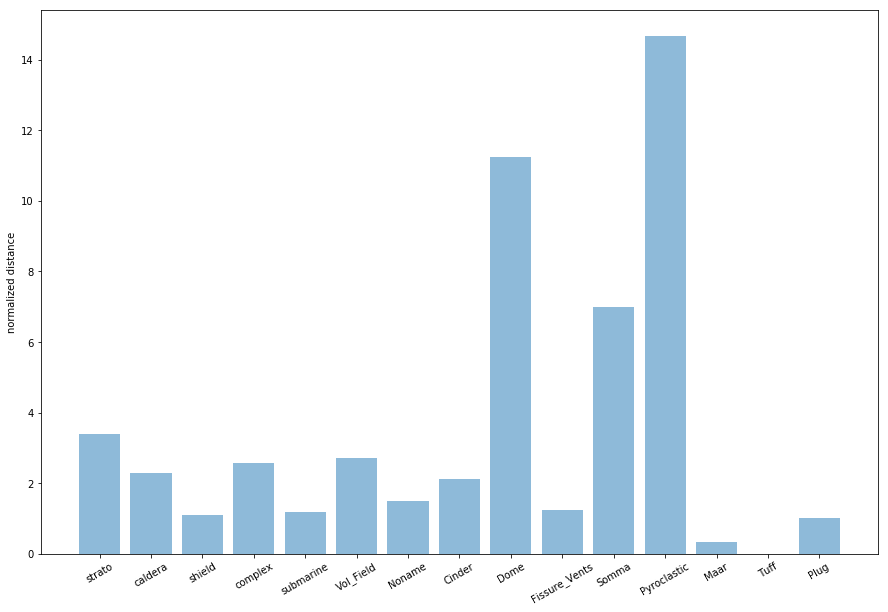

In [53]:
objects = ('strato', 'caldera', 'shield', 'complex', 'submarine', 'Vol_Field', 'Noname', 'Cinder', 'Dome', 
           'Fissure_Vents', 'Somma', 'Pyroclastic', 'Maar', 'Tuff', 'Plug')
y_pos = np.arange(len(objects))
performance = normalized_dist
 
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects, rotation = 30)
plt.ylabel('normalized distance')

In [54]:
earthquakes_dist_gdf2 = gpd.GeoDataFrame(quake_vol_dist, geometry = earthquakes_gdf.geometry)

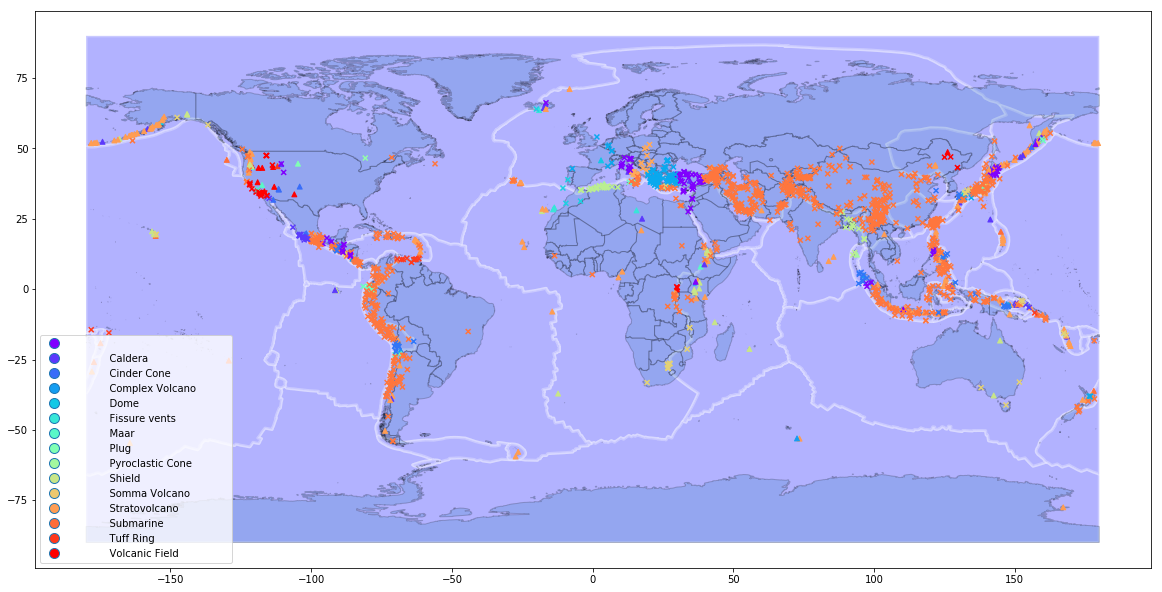

In [55]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 3.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.2)
volcanoes_gdf.plot(ax=ax, column = "Type", cmap = "rainbow", markersize = 25, legend = True, marker = "^")
earthquakes_dist_gdf2.plot(ax=ax, markersize = 25, column = "closest_vol", cmap = "rainbow", marker = "x")

The above steps were run on a larger dataset and exported as a csv. The data have been read in below in a more complete version

In [56]:
boundary_distances2 = pd.read_csv("MR_Data/Earthquake_boundary_distances2")
boundary_distances2 = boundary_distances2.drop("Unnamed: 0", axis = 1)

In [57]:
conditions = [
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['sub_geo2']), 
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['ccb_geo2']),
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['crb_geo2']), 
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['ctf_geo2']),
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['ocb_geo2']), 
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['osr_geo2']), 
    (boundary_distances2['boundaries_geo2'] == boundary_distances2['otf_geo2'])]
choices = ['SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF']
boundary_distances2['closest_boundary2'] = np.select(conditions, choices, default=np.nan)

In [58]:
#boundary_distances2["closest_boundary2"].value_counts()
bound_dist_count2 = np.array([12152, 2566, 2057, 1768, 977, 2491, 2627])

In [59]:
norm_bound_dist2 = np.divide(bound_dist_count, bound_length)

Text(0,0.5,'normalized distance to closest boundary')

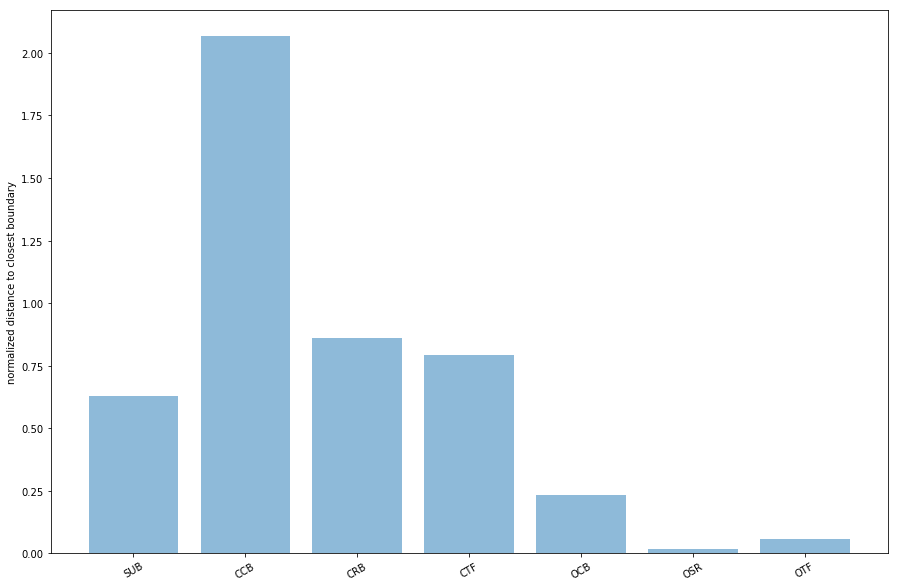

In [60]:
objects = ('SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF')
y_pos = np.arange(len(objects))
performance = norm_bound_dist2
 
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects, rotation = 30)
plt.ylabel('normalized distance to closest boundary')

In [61]:
earthquakes2_gdf = gpd.read_file("MR_Data/earthquakes2.GeoJSON")
earthquakes2_gdf["closest_boundary2"] = boundary_distances2["closest_boundary2"]

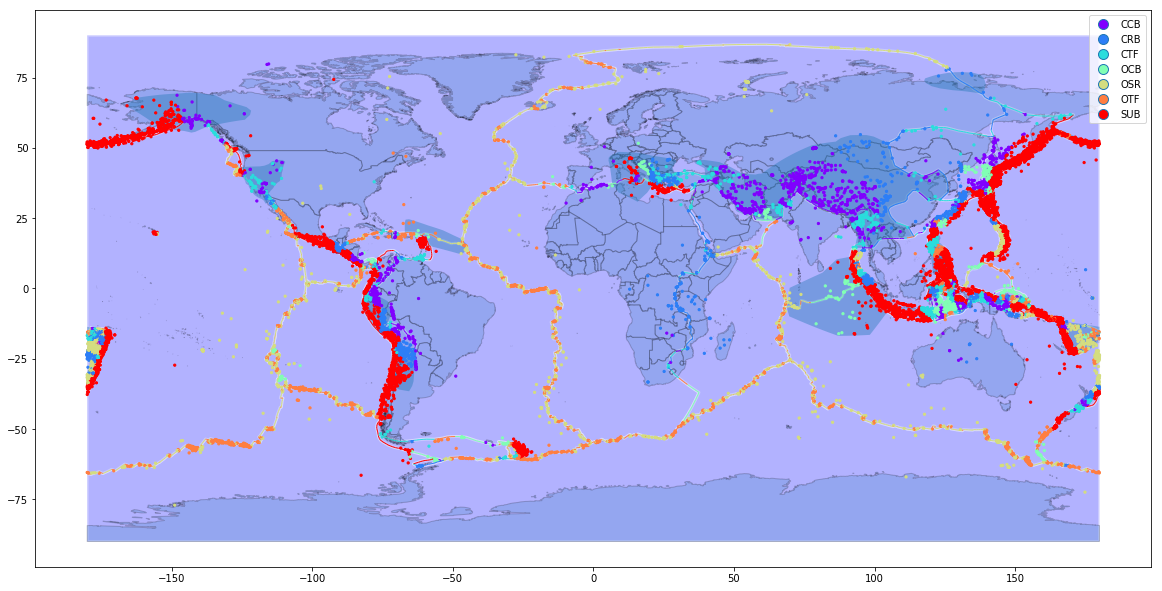

In [62]:
orogen_gdf = gpd.read_file("MR_Data/PB2002_orogens.json")
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 3.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.2)
boundaries_gdf.plot(ax=ax, column = "STEPCLASS", cmap = "rainbow", lw = 1, legend = True)
orogen_gdf.plot(ax=ax, alpha = 0.4)
earthquakes2_gdf.plot(ax=ax, markersize = 5, column = "closest_boundary2", cmap = "rainbow")